In [1]:
# load packages
import torch
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datasets import Dataset
from sklearn.manifold import TSNE

In [2]:
# load distance matrix-ids from file
distance_matrix_ids = torch.load("../data/distance_matrix_ids")

In [3]:
# load distance matrix from file
distance_matrix = torch.load("../data/distance_matrix_cos_dist")

In [4]:
# load video data
videos = Dataset.load_from_disk("../data/videos")

In [5]:
# add color column to given data frame
def add_color_column(dataframe):
    colors = []
    for d in dataframe['channel']:
        if d == 'Al-Jazeera-English':
            colors.append('orange')
        if d == 'BBC-News':
            colors.append('red')
        if d == 'CCTV-Video-News-Agency':
            colors.append('black')
        if d == 'CNN-News':
            colors.append('purple')
        if d == 'DW-News':
            colors.append('blue')
        if d == 'Fox-News':
            colors.append('darkgreen')
    # add them to the data frame
    dataframe['colors'] = colors

In [18]:
perplexity = 4800

In [19]:
# transform distance matrix to 2-dimensional distance matrix
distance_matrix_embedded = TSNE(n_components=2, # number of desired dimensions
                                learning_rate='auto',
                                n_iter=2000, # number of iterations, default is 1000
                                early_exaggeration=48.0, # default is 12.0
                                init='pca',
                                perplexity=perplexity # perplexity is related to the number of neighbours
                                ).fit_transform(distance_matrix)

In [10]:
# save 2d distance matrix
np.save('../data/2d_distance_matrix_tsne.npy', distance_matrix_embedded)

In [21]:
# turn matrix into pandas data frame
df = pandas.DataFrame(distance_matrix_embedded, columns=['x','y'])
# add channel to data frame
df['channel'] = videos['channel']
# add ids
df['id'] = distance_matrix_ids
# add text
df['text'] = videos['text']
# add colors
add_color_column(df)

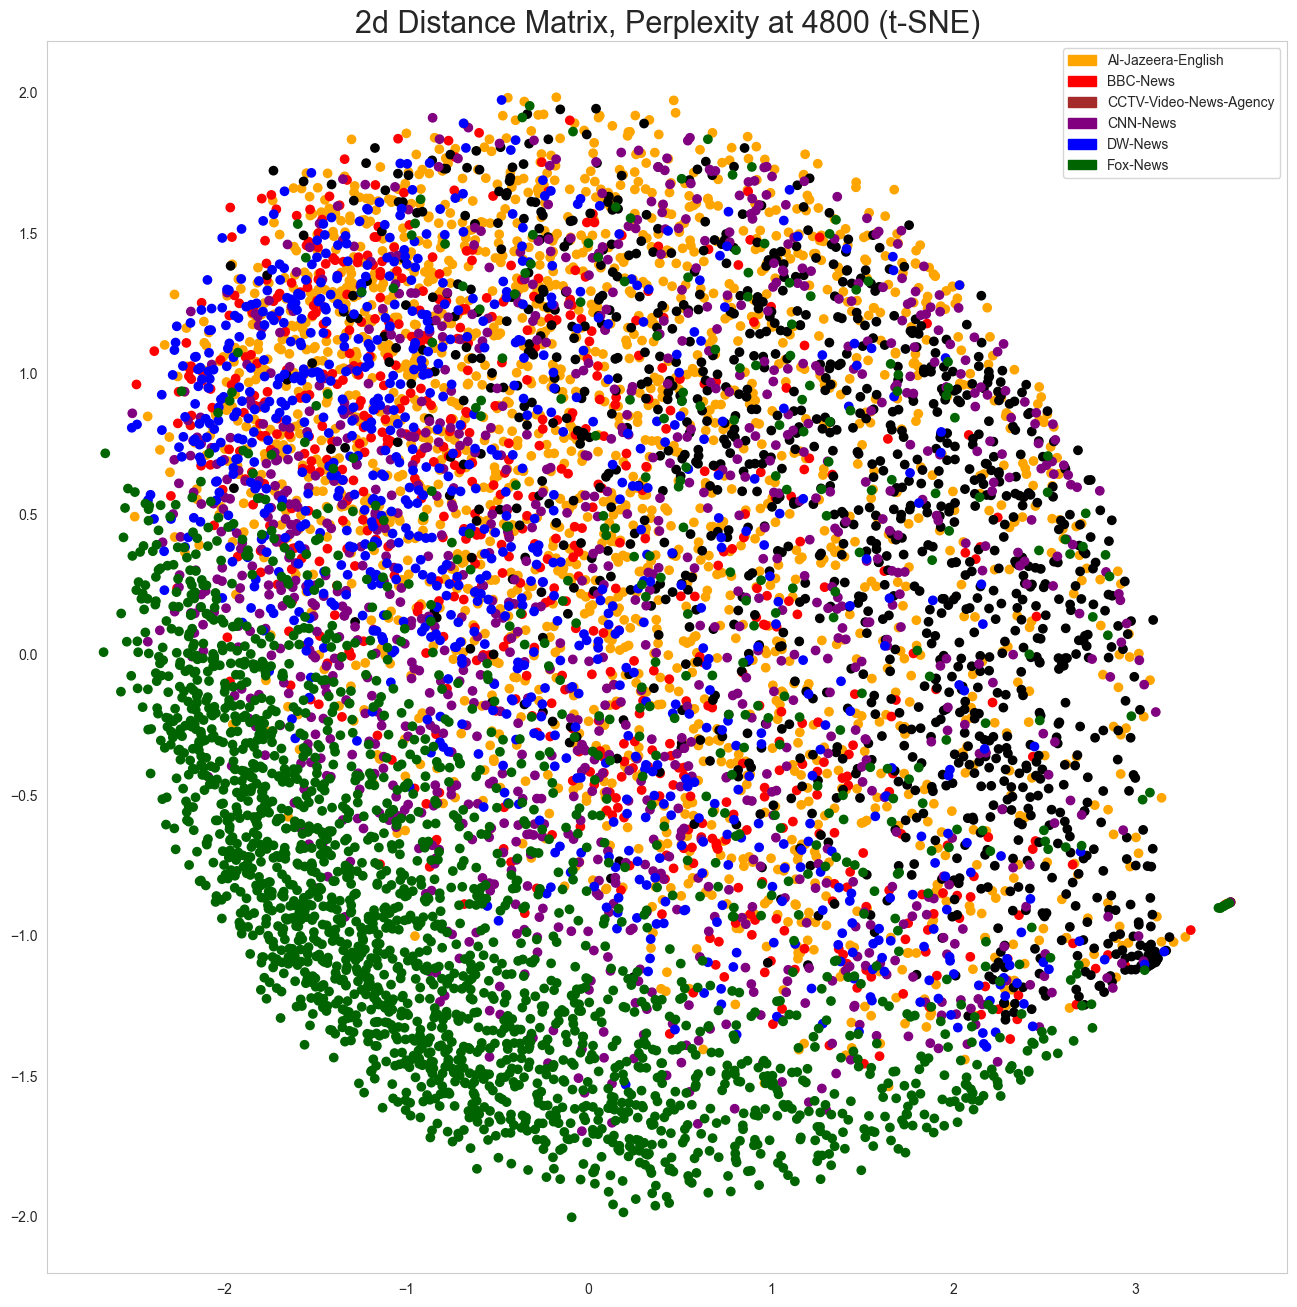

In [22]:
# Creating legend with color box
pop_a = mpatches.Patch(color='orange', label='Al-Jazeera-English')
pop_b = mpatches.Patch(color='red', label='BBC-News')
pop_c = mpatches.Patch(color='brown', label='CCTV-Video-News-Agency')
pop_d = mpatches.Patch(color='purple', label='CNN-News')
pop_e = mpatches.Patch(color='blue', label='DW-News')
pop_f = mpatches.Patch(color='darkgreen', label='Fox-News')
# create plot
fig, ax = plt.subplots(figsize=(16,16))
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df['x'], df['y'], c=df['colors'])
# add ids
'''
for i, txt, in enumerate(distance_matrix_ids):
    if i % 100 == 0:
        ax.annotate(str(txt), (df['x'][i], df['y'][i]))
'''
# add title, legend
plt.title(f'2d Distance Matrix, Perplexity at {perplexity} (t-SNE)', fontsize=22)
ax.legend(handles=[pop_a,pop_b, pop_c, pop_d, pop_e, pop_f])

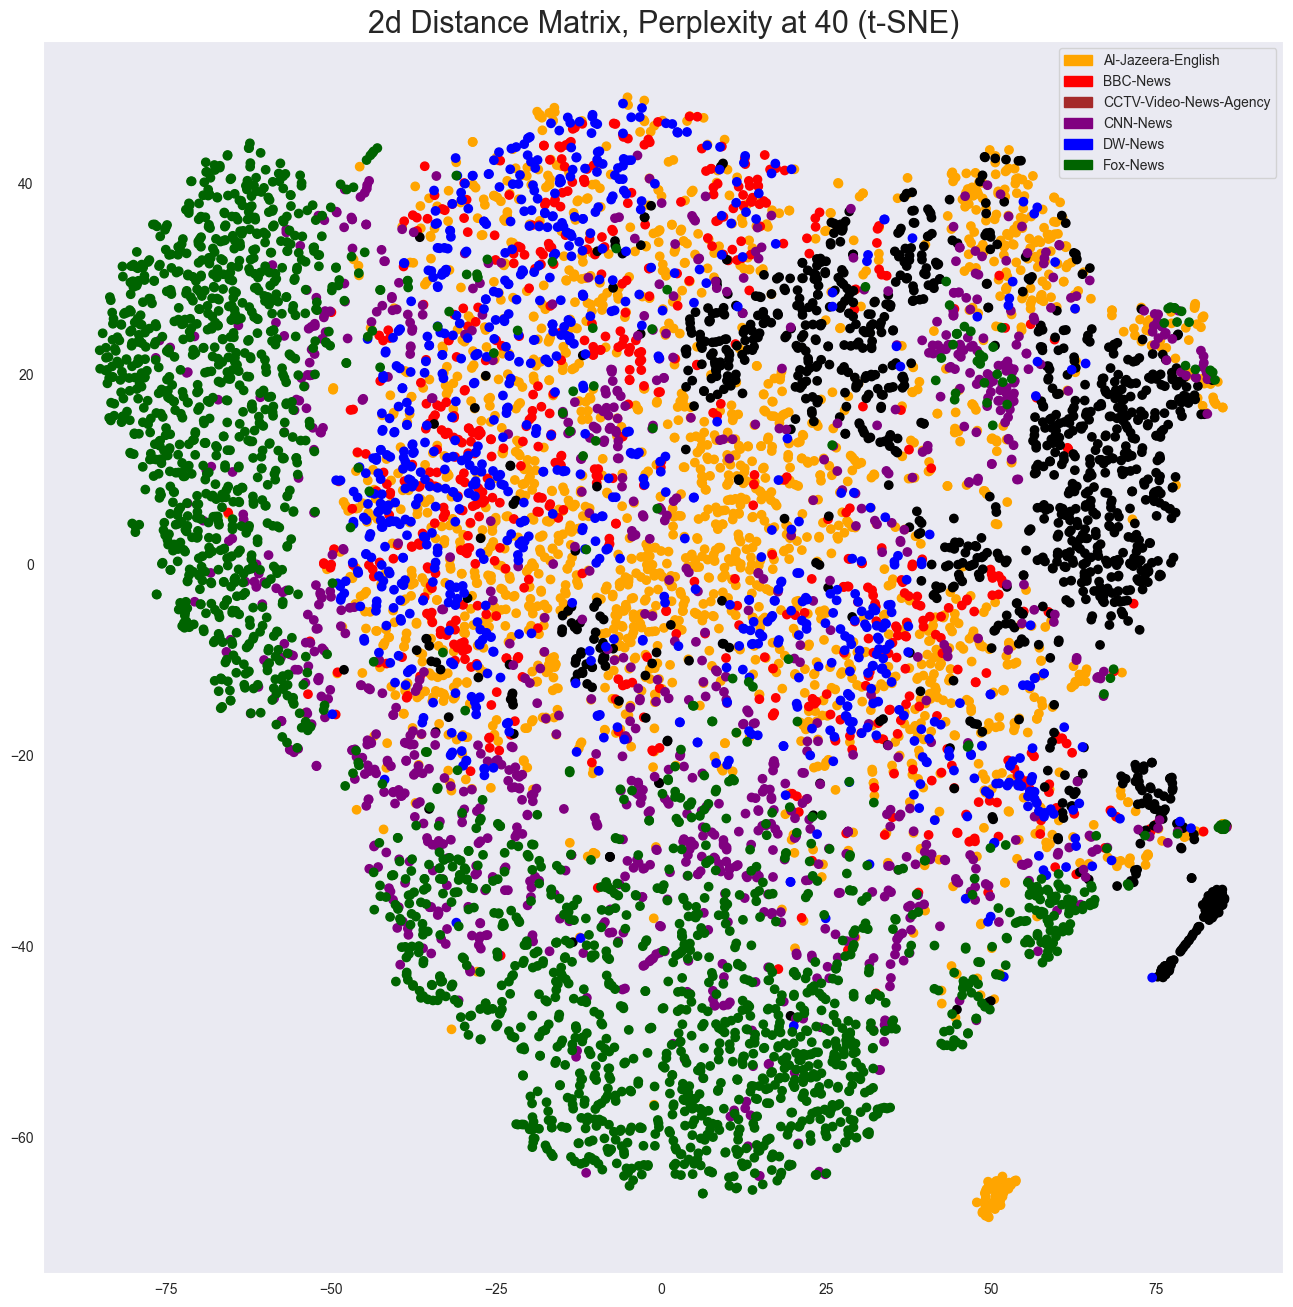

In [9]:
# transform distance matrix to 3-dimensional distance matrix
distance_matrix_embedded = TSNE(n_components=3, # number of desired dimensions
                                learning_rate='auto',
                                n_iter=2000, # number of iterations default is 1000
                                early_exaggeration=48.0, # default is 12.0
                                init='pca',
                                perplexity=perplexity # perplexity is related to the number of neighbours
                                ).fit_transform(distance_matrix)

In [17]:
np.save('../data/3d_distance_matrix_tsne.npy', distance_matrix_embedded)

In [100]:
# turn matrix into pandas data frame
df_3d = pandas.DataFrame(distance_matrix_embedded, columns=['x', 'y', 'z'])
# add channel to data frame
df_3d['channel'] = videos['channel']
# add color column
add_color_column(df_3d)

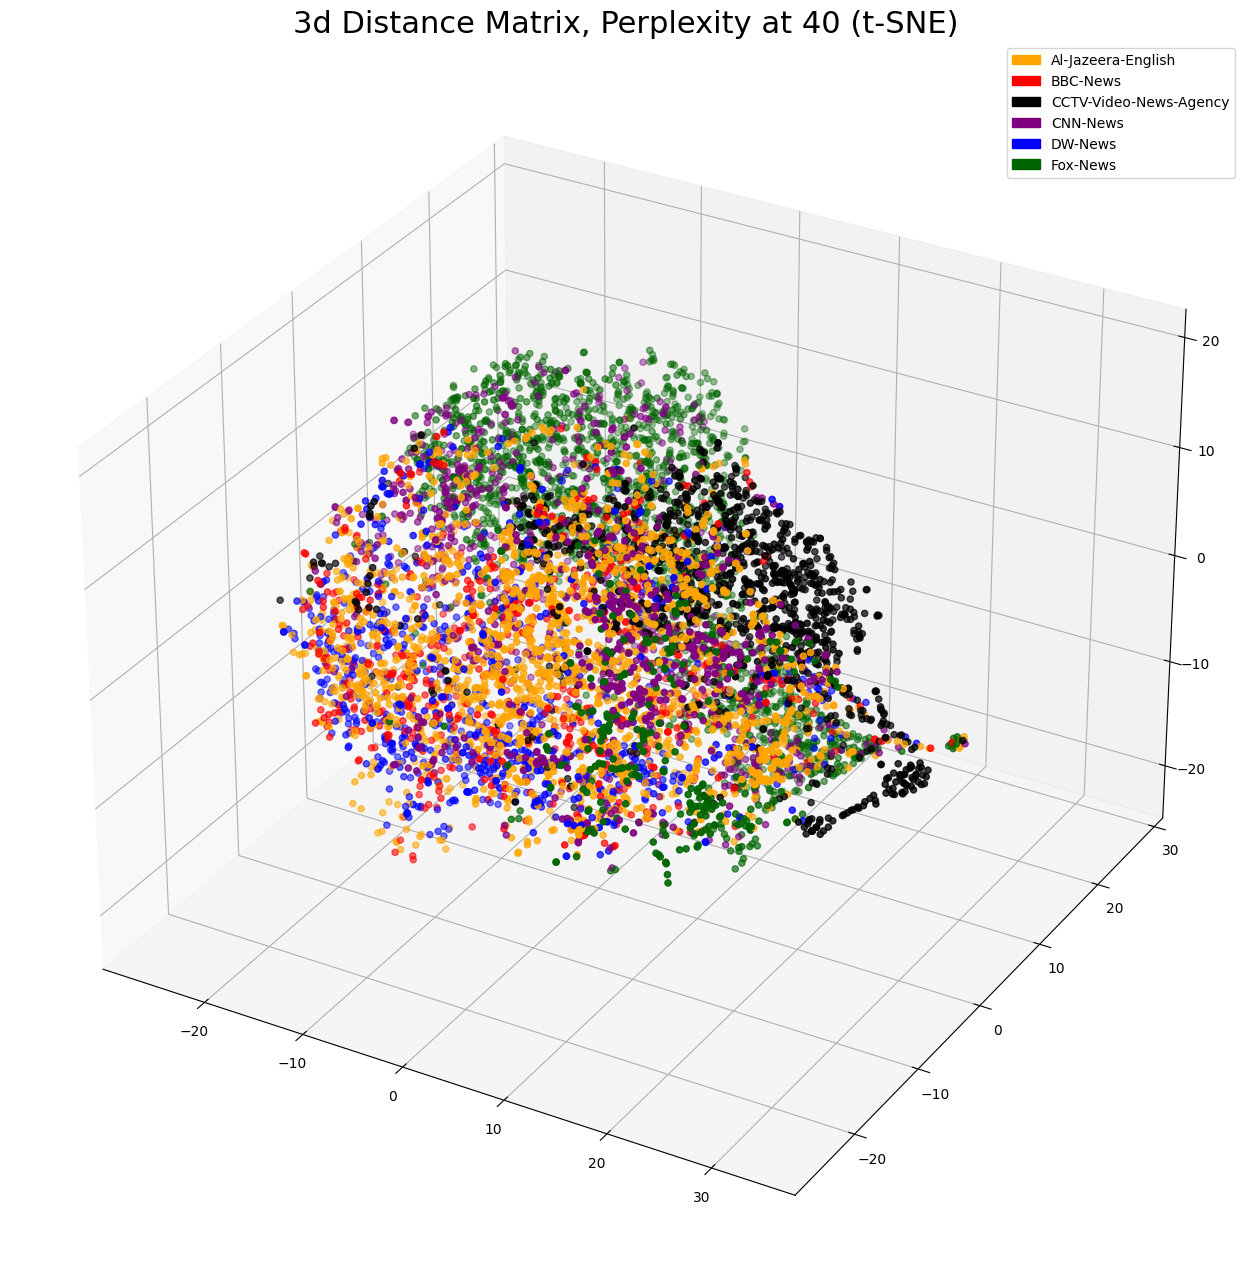

In [101]:
 # plot distance matrix in 3 dimensions
# Creating legend with color box
pop_a = mpatches.Patch(color='orange', label='Al-Jazeera-English')
pop_b = mpatches.Patch(color='red', label='BBC-News')
pop_c = mpatches.Patch(color='black', label='CCTV-Video-News-Agency')
pop_d = mpatches.Patch(color='purple', label='CNN-News')
pop_e = mpatches.Patch(color='blue', label='DW-News')
pop_f = mpatches.Patch(color='darkgreen', label='Fox-News')
# create plot
figure = plt.figure(figsize=(16,16))
ax = figure.add_subplot(projection='3d')
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df_3d['x'], df_3d['y'], df_3d['z'], c=df_3d['colors'])
# add title, legend
plt.title(f'3d Distance Matrix, Perplexity at {perplexity} (t-SNE)', fontsize=22)
ax.legend(handles=[pop_a,pop_b, pop_c, pop_d, pop_e, pop_f])

In [99]:
df.loc[df['id'] == 111597]

,x,y,channel,id,text,colors
5200,-0.11282,-1.472268,DW-News,111597,Why are Russian oligarchs forming private armi...,blue


In [98]:
df.loc[df['id'] == 56938]

,x,y,channel,id,text,colors
400,-0.017591,-1.460116,Al-Jazeera-English,56938,What is behind rising anti-Semitism around the...,orange
2060,0.078235,-1.407873,BBC-News,56938,UK-Israeli mother wounded in West Bank attack ...,red
2867,0.151905,-1.575776,CCTV-Video-News-Agency,56938,Xi Inspects Navy of PLA Southern Theater Comma...,black
5006,-0.104879,-1.493539,DW-News,56938,Northern Ireland marks 25 years since Good Fri...,blue
6231,-0.020289,-1.661630,Fox-News,56938,911 call from Louisville gunman's mother relea...,darkgreen
